<a href="https://colab.research.google.com/github/AfifNurraihan/Kumpulan-Proyek-Python/blob/main/NLP_dengan_model_arsitektur_LSTM_(GOP_Twitter_Debate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library and read datasets
import pandas as pd
df = pd.read_csv('/content/Sentiment.csv')
df = df.drop(columns=['id', 'candidate', 'candidate_confidence', 'relevant_yn',
                      'relevant_yn_confidence', 'sentiment_confidence',
                      'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
                      'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
                      'subject_matter_gold','tweet_coord', 'tweet_created',
                      'tweet_id', 'tweet_location', 'user_timezone'])
df

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
...,...,...
13866,Negative,RT @cappy_yarbrough: Love to see men who will ...
13867,Positive,RT @georgehenryw: Who thought Huckabee exceede...
13868,Positive,"RT @Lrihendry: #TedCruz As President, I will a..."
13869,Negative,RT @JRehling: #GOPDebate Donald Trump says tha...


In [ ]:
#Checking for null values
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [ ]:
# Cleaning text twitter
import re
def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        # remove urls
        tweet = re.sub(r'http\S+', ' ', data[i])
        # remove html tags
        tweet = re.sub(r'<.*?>', ' ', tweet)
        #remove @...
        tweet = re.sub('@\w+([-.]\w+)*', ' ', tweet)
        #remove &...
        tweet = re.sub('&\w+([-.]\w+)*', ' ', tweet)
        # remove digits
        tweet = re.sub(r'\d+', ' ', tweet)
        # remove hashtags
        tweet = re.sub(r'#\w+', ' ', tweet)
        review = re.sub('[^a-zA-Z]', ' ', tweet)
        review = review.lower()
        review = review.split()
        corpus.append(review)
    return corpus

In [ ]:
df['CleanText'] = preprocessor(df['text'])
df

,sentiment,text,CleanText
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...,"[rt, how, did, everyone, feel, about, the, cli..."
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...,"[rt, didn, t, catch, the, full, last, night, h..."
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...,"[rt, no, mention, of, tamir, rice, and, the, w..."
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...,"[rt, that, carly, fiorina, is, trending, hours..."
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,"[rt, w, delivered, the, highest, ratings, in, ..."
...,...,...,...
13866,Negative,RT @cappy_yarbrough: Love to see men who will ...,"[rt, love, to, see, men, who, will, never, be,..."
13867,Positive,RT @georgehenryw: Who thought Huckabee exceede...,"[rt, who, thought, huckabee, exceeded, their, ..."
13868,Positive,"RT @Lrihendry: #TedCruz As President, I will a...","[rt, as, president, i, will, always, tell, the..."
13869,Negative,RT @JRehling: #GOPDebate Donald Trump says tha...,"[rt, donald, trump, says, that, he, doesn, t, ..."


In [ ]:
# View class variables using .unique()
df['sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
# Perform one-hot-encoding and create a new dataframe
sentiment = pd.get_dummies(df.sentiment)
df_new = pd.concat([df, sentiment], axis=1)
df_new = df_new.drop(columns='sentiment')
df_new

,text,CleanText,Negative,Neutral,Positive
0,RT @NancyLeeGrahn: How did everyone feel about...,"[rt, how, did, everyone, feel, about, the, cli...",0,1,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,"[rt, didn, t, catch, the, full, last, night, h...",0,0,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,"[rt, no, mention, of, tamir, rice, and, the, w...",0,1,0
3,RT @RobGeorge: That Carly Fiorina is trending ...,"[rt, that, carly, fiorina, is, trending, hours...",0,0,1
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,"[rt, w, delivered, the, highest, ratings, in, ...",0,0,1
...,...,...,...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,"[rt, love, to, see, men, who, will, never, be,...",1,0,0
13867,RT @georgehenryw: Who thought Huckabee exceede...,"[rt, who, thought, huckabee, exceeded, their, ...",0,0,1
13868,"RT @Lrihendry: #TedCruz As President, I will a...","[rt, as, president, i, will, always, tell, the...",0,0,1
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,"[rt, donald, trump, says, that, he, doesn, t, ...",1,0,0


In [ ]:
# Converts the values ​​from the dataframe into the numpy array data type using .values()
oritweet = df_new['CleanText'].values
sentimen = df_new[['Negative', 'Neutral', 'Positive']].values

In [ ]:
# Divide the data into training data and testing data
from sklearn.model_selection import train_test_split
oritweet_latih, oritweet_test, sentimen_latih, sentimen_test = train_test_split(oritweet, sentimen, test_size=0.2)

In [ ]:
# Convert each word in the dataset into a numeric number with the Tokenizer function
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='<oov>')
tokenizer.fit_on_texts(oritweet_latih) 
tokenizer.fit_on_texts(oritweet_test)
 
sekuens_latih = tokenizer.texts_to_sequences(oritweet_latih)
sekuens_test = tokenizer.texts_to_sequences(oritweet_test)
 
padded_latih = pad_sequences(sekuens_latih,padding='post',
                             maxlen=20,truncating='post') 
padded_test = pad_sequences(sekuens_test,padding='post',
                             maxlen=20,truncating='post')

In [ ]:
# Callback Function
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai >96%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Creating a model architecture using layers Embedding and LSTM
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train the model by calling the function .fit()
num_epochs = 30
history = model.fit(padded_latih, sentimen_latih, epochs=num_epochs,validation_data=(padded_test, sentimen_test), verbose=2)

Epoch 1/30
347/347 - 22s - loss: 0.8936 - accuracy: 0.6078 - val_loss: 0.8112 - val_accuracy: 0.6483 - 22s/epoch - 63ms/step
Epoch 2/30
347/347 - 12s - loss: 0.7539 - accuracy: 0.6643 - val_loss: 0.7647 - val_accuracy: 0.6512 - 12s/epoch - 35ms/step
Epoch 3/30
347/347 - 8s - loss: 0.6703 - accuracy: 0.7061 - val_loss: 0.7868 - val_accuracy: 0.6479 - 8s/epoch - 23ms/step
Epoch 4/30
347/347 - 8s - loss: 0.6076 - accuracy: 0.7528 - val_loss: 0.8252 - val_accuracy: 0.6602 - 8s/epoch - 24ms/step
Epoch 5/30
347/347 - 8s - loss: 0.5492 - accuracy: 0.7854 - val_loss: 0.8431 - val_accuracy: 0.6609 - 8s/epoch - 24ms/step
Epoch 6/30
347/347 - 8s - loss: 0.4814 - accuracy: 0.8178 - val_loss: 0.9159 - val_accuracy: 0.6580 - 8s/epoch - 24ms/step
Epoch 7/30
347/347 - 8s - loss: 0.4324 - accuracy: 0.8410 - val_loss: 1.0268 - val_accuracy: 0.6523 - 8s/epoch - 24ms/step
Epoch 8/30
347/347 - 8s - loss: 0.3961 - accuracy: 0.8539 - val_loss: 1.1549 - val_accuracy: 0.6641 - 8s/epoch - 24ms/step
Epoch 9/30
3

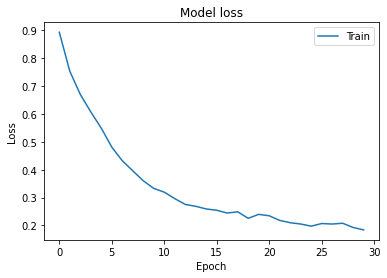

In [ ]:
# plot loss and accuracy during training and validation.
# Plot Loss Training
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

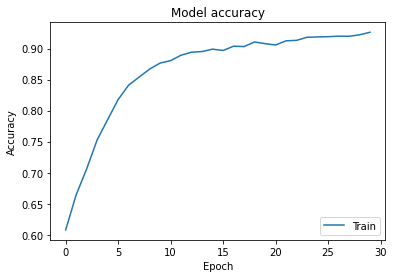

In [ ]:
# Plot Accuracy Training
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()